In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.markers import MarkerStyle
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pathlib import Path
import seaborn as sns
import statsmodels.api as sm

# File to Load (Remember to Change These)
sales_csv = Path("Resources/vgsales.csv")

# Read School and Student Data File and store into Pandas DataFrames
sales_data = pd.read_csv(sales_csv)



In [69]:
sales_data = sales_data.drop(columns="Rank")

In [70]:
#Establish console maker
sales_data['Platform Company'] = sales_data['Platform']

In [71]:
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["N64","GC","Wii","WiiU","NES","GB","DS","SNES","GBA","3DS"],"Nintendo")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["PS","PS2","PS3","PSV","PSP","PS4"],"Sony")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["XOne","XB","X360"],"Microsoft")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["GG","SAT","Sega","GEN","SCD","DC"],"Sega")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["2600"],"Atari")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["WS"],"BANDAI")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["NG"],"SNK")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["TG16","PCFX"],"NEC")
sales_data["Platform Company"].unique()

array(['Nintendo', 'Microsoft', 'Sony', 'PC', 'Atari', 'Sega', 'BANDAI',
       'SNK', 'NEC', '3DO'], dtype=object)

In [72]:
sales_data["Genre"] = sales_data["Genre"].replace(["Sports","Racing"],"Sports & Racing")
sales_data["Genre"] = sales_data["Genre"].replace(["Puzzle","Strategy"],"Puzzle & Strategy")
sales_data["Genre"] = sales_data["Genre"].replace(["Platform"],"Adventure")

In [73]:
sales_data["Year"].isnull().sum()

271

In [74]:
#drop games with null year
sales_data_clean = sales_data.dropna(subset=["Year"]).copy()

In [75]:
sales_data_clean["Year"] = sales_data_clean["Year"].astype(int)

In [76]:
sales_data_clean.sort_values("NA_Sales")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
13655,Phantom Kingdom Portable,PSP,2011,Role-Playing,Nippon Ichi Software,0.00,0.00,0.04,0.00,0.04,Sony
13696,Banushi Life Game: Winner's Circle,DS,2007,Sports & Racing,Genki,0.00,0.00,0.04,0.00,0.04,Nintendo
13695,Breeding Stud 2,PS,1998,Sports & Racing,Konami Digital Entertainment,0.00,0.00,0.04,0.00,0.04,Sony
10004,Nobunaga no Yabou: Tenshoki,SAT,1995,Puzzle & Strategy,Tecmo Koei,0.00,0.00,0.11,0.00,0.11,Sega
10005,Stronghold,PC,2001,Puzzle & Strategy,Gathering of Developers,0.00,0.09,0.00,0.02,0.11,PC
...,...,...,...,...,...,...,...,...,...,...,...
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
5,Tetris,GB,1989,Puzzle & Strategy,Nintendo,23.20,2.26,4.22,0.58,30.26,Nintendo
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Nintendo
1,Super Mario Bros.,NES,1985,Adventure,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo


In [77]:
year_2016 = sales_data_clean[sales_data_clean["Year"] == 2016].index
sales_data_clean.drop(year_2016, inplace=True)

In [78]:
year_2017 = sales_data_clean[sales_data_clean["Year"] == 2017].index
sales_data_clean.drop(year_2017, inplace=True)

In [79]:
year_2020 = sales_data_clean[sales_data_clean["Year"] == 2020].index
sales_data_clean.drop(year_2020, inplace=True)

In [80]:
genre_name = []

for x in sales_data_clean["Genre"]:
    
    if x not in genre_name:
        genre_name.append(x)
genre_name.sort()
genre_name

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Puzzle & Strategy',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports & Racing']

In [81]:
#Correlations and regressions.

In [82]:
full_genre = LinearSegmentedColormap.from_list('custom_colors',["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"])

In [83]:
action = sales_data_clean[sales_data_clean["Genre"] == "Action"]
adv = sales_data_clean[sales_data_clean["Genre"] == "Adventure"]
fight = sales_data_clean[sales_data_clean["Genre"] == "Fighting"]
misc = sales_data_clean[sales_data_clean["Genre"] == "Misc"]
puzzle = sales_data_clean[sales_data_clean["Genre"] == "Puzzle & Strategy"]
rpg = sales_data_clean[sales_data_clean["Genre"] == "Role-Playing"]
shooter = sales_data_clean[sales_data_clean["Genre"] == "Shooter"]
sports = sales_data_clean[sales_data_clean["Genre"] == "Sports & Racing"]
simulation = sales_data_clean[sales_data_clean["Genre"] == "Simulation"]

In [84]:
pop_x = shooter.NA_Sales
pop_y = adv.NA_Sales
print(round(pop_x.mean(),2))
print(round(pop_x.var(),2))
print(len(pop_x))
print(round(pop_y.mean(),2))
print(round(pop_y.var(),2))
print(len(pop_y))

0.45
1.5
1250
0.26
1.03
2108


In [85]:
st.ttest_ind(pop_x.values, pop_y.values, equal_var=False)

Ttest_indResult(statistic=4.7344154046532445, pvalue=2.3331932271206595e-06)

In [86]:
#help(st.ttest_ind)

The correlation is 0.45.


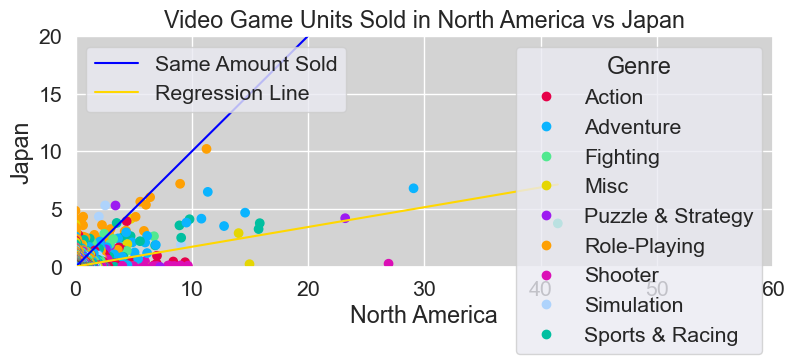

In [87]:
corr = round(st.pearsonr(sales_data_clean["NA_Sales"], sales_data_clean["JP_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs JP
x_values = sales_data_clean["NA_Sales"]
y_values = sales_data_clean["JP_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(9, 3),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,60])
plt.ylim([0,20])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre")
ax.add_artist(leg1)

plt.title("Video Game Units Sold in North America vs Japan")
plt.xlabel("North America")
plt.ylabel("Japan")
plt.show()

The correlation is 0.63.


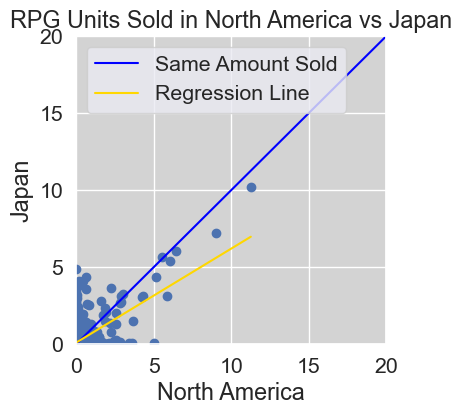

In [88]:
corr = round(st.pearsonr(rpg["NA_Sales"], rpg["JP_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = rpg["NA_Sales"]
y_values = rpg["JP_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(4, 4),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,20])
plt.ylim([0,20])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")

plt.title("RPG Units Sold in North America vs Japan")
plt.xlabel("North America")
plt.ylabel("Japan")
plt.show()

In [89]:
rpg_out = rpg.loc[(rpg["JP_Sales"]>4) & (rpg["NA_Sales"]>4)]
rpg_out

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,Nintendo
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,Nintendo
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,Nintendo
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,Nintendo
32,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,Nintendo


In [90]:
x1 = sports["NA_Sales"]
y1 = sports["EU_Sales"]
X = sm.add_constant(x1)
model = sm.OLS(y1, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               EU_Sales   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                 1.064e+04
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        19:12:53   Log-Likelihood:                -1365.8
No. Observations:                3472   AIC:                             2736.
Df Residuals:                    3470   BIC:                             2748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0199      0.006     -3.118      0.0

In [91]:
x1 = shooter["NA_Sales"]
y1 = shooter["JP_Sales"]
X = sm.add_constant(x1)
model = sm.OLS(y1, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               JP_Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     63.55
Date:                Tue, 16 May 2023   Prob (F-statistic):           3.51e-15
Time:                        19:12:53   Log-Likelihood:                 1081.5
No. Observations:                1250   AIC:                            -2159.
Df Residuals:                    1248   BIC:                            -2149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0215      0.003      7.002      0.0

The correlation is 0.77.


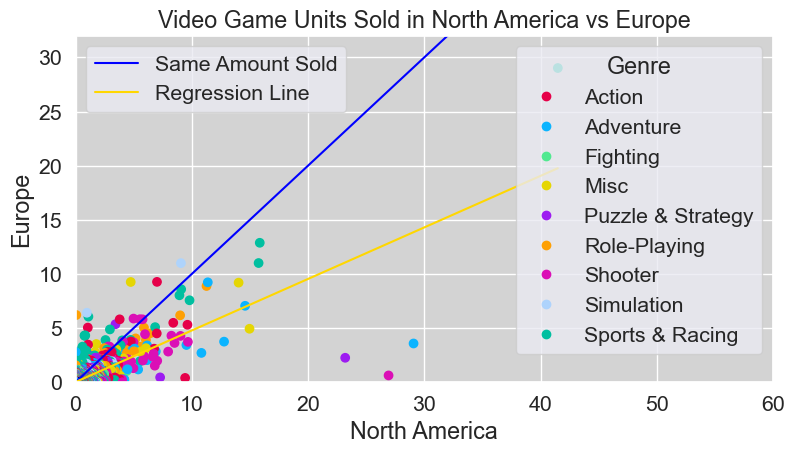

In [92]:
corr = round(st.pearsonr(sales_data_clean["NA_Sales"], sales_data_clean["EU_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs EU
x_values = sales_data_clean["NA_Sales"]
y_values = sales_data_clean["EU_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"


fig, ax = plt.subplots(figsize=(9, 4.5),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,60])
plt.ylim([0,32])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre")
ax.add_artist(leg1)

plt.title("Video Game Units Sold in North America vs Europe")
plt.xlabel("North America")
plt.ylabel("Europe")
plt.show()

The correlation is 0.63.


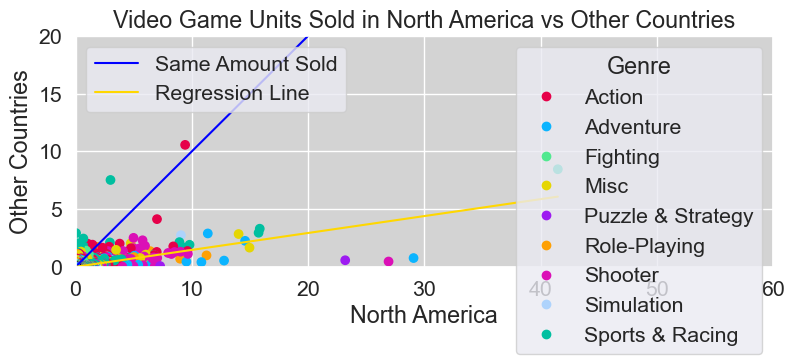

In [93]:
corr = round(st.pearsonr(sales_data_clean["NA_Sales"], sales_data_clean["Other_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs JP
x_values = sales_data_clean["NA_Sales"]
y_values = sales_data_clean["Other_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(9, 3),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,60])
plt.ylim([0,20])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre")
ax.add_artist(leg1)

plt.title("Video Game Units Sold in North America vs Other Countries")
plt.xlabel("North America")
plt.ylabel("Other Countries")
plt.show()

The correlation is 0.44.


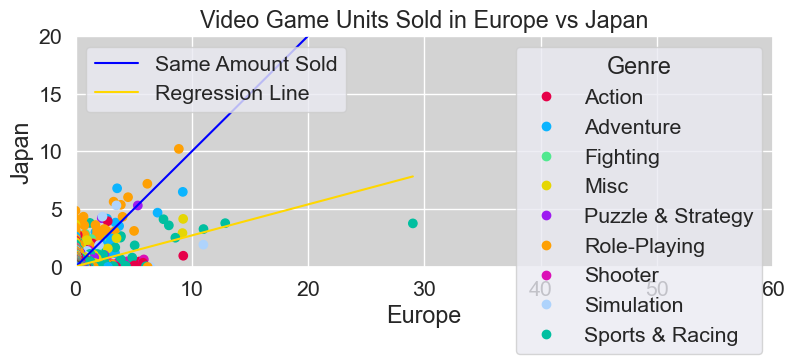

In [94]:
corr = round(st.pearsonr(sales_data_clean["EU_Sales"], sales_data_clean["JP_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs JP
x_values = sales_data_clean["EU_Sales"]
y_values = sales_data_clean["JP_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(9, 3),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,60])
plt.ylim([0,20])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre")
ax.add_artist(leg1)

plt.title("Video Game Units Sold in Europe vs Japan")
plt.xlabel("Europe")
plt.ylabel("Japan")
plt.show()

The correlation is 0.73.


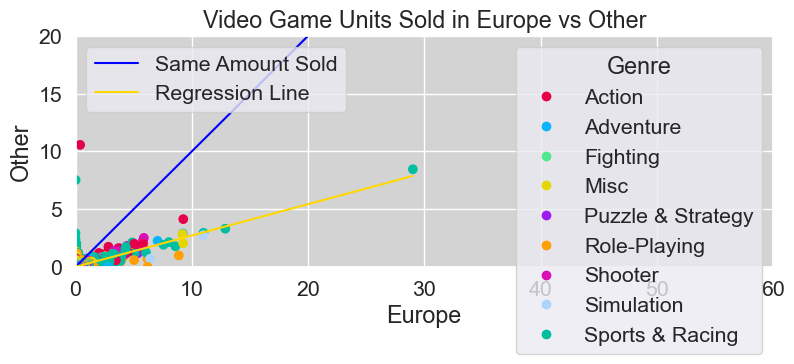

In [95]:
corr = round(st.pearsonr(sales_data_clean["EU_Sales"], sales_data_clean["Other_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs JP
x_values = sales_data_clean["EU_Sales"]
y_values = sales_data_clean["Other_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(9, 3),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,60])
plt.ylim([0,20])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre")
ax.add_artist(leg1)

plt.title("Video Game Units Sold in Europe vs Other")
plt.xlabel("Europe")
plt.ylabel("Other")
plt.show()

The correlation is 0.29.


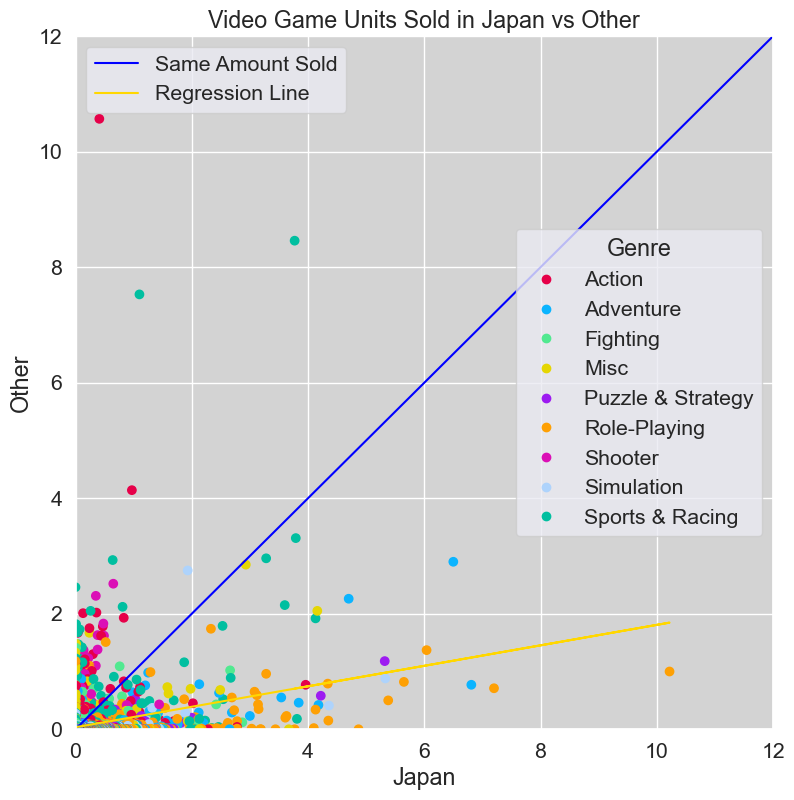

In [96]:
corr = round(st.pearsonr(sales_data_clean["JP_Sales"], sales_data_clean["Other_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs JP
x_values = sales_data_clean["JP_Sales"]
y_values = sales_data_clean["Other_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(9, 9),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,12])
plt.ylim([0,12])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre")
ax.add_artist(leg1)

plt.title("Video Game Units Sold in Japan vs Other")
plt.xlabel("Japan")
plt.ylabel("Other")
plt.show()

The correlation is 0.94.


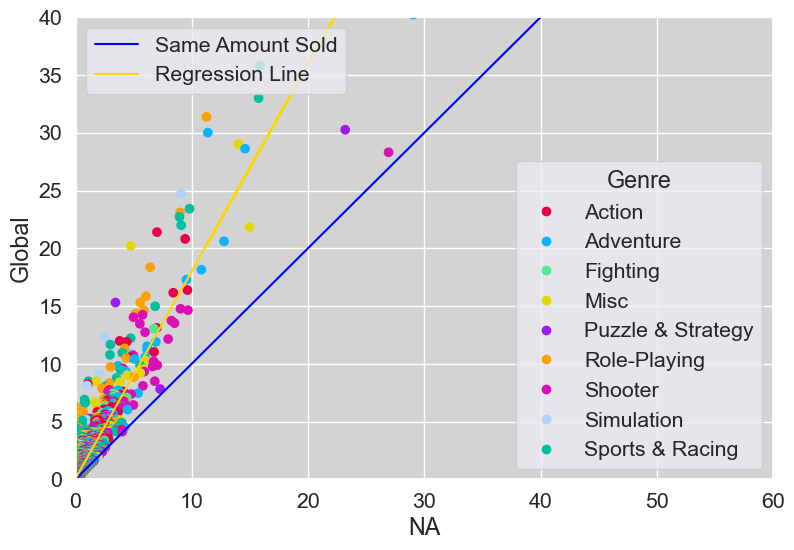

In [97]:
corr = round(st.pearsonr(sales_data_clean["NA_Sales"], sales_data_clean["Global_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = sales_data_clean["NA_Sales"]
y_values = sales_data_clean["Global_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(9, 6),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,60])
plt.ylim([0,40])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre")
ax.add_artist(leg1)

plt.xlabel("NA")
plt.ylabel("Global")
plt.show()

In [98]:
x1 = rpg["NA_Sales"]
y1 = rpg["EU_Sales"]
X = sm.add_constant(x1)
model = sm.OLS(y1, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               EU_Sales   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     4690.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        19:12:58   Log-Likelihood:                 8.3539
No. Observations:                1429   AIC:                            -12.71
Df Residuals:                    1427   BIC:                            -2.178
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0145      0.007     -2.162      0.0

The correlation is 0.61.


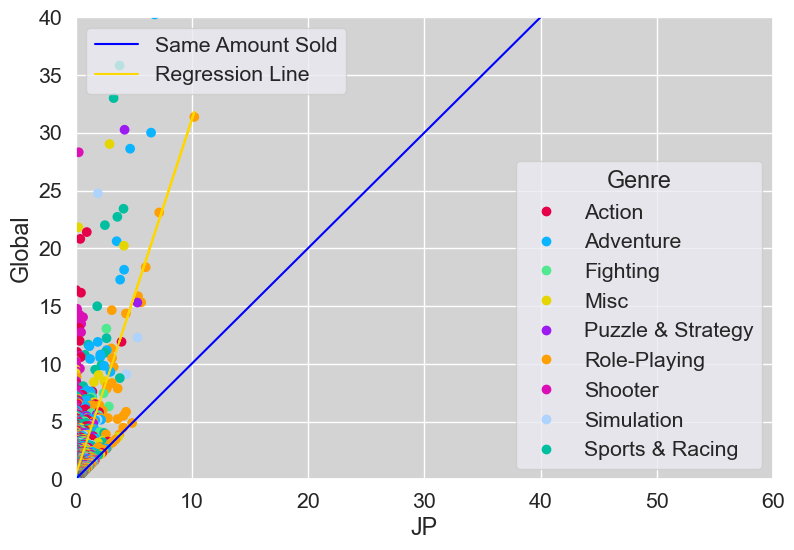

In [99]:
corr = round(st.pearsonr(sales_data_clean["JP_Sales"], sales_data_clean["Global_Sales"])[0],2)
print(f"The correlation is {corr}.")

#JP vs Global

x_values = sales_data_clean["JP_Sales"]
y_values = sales_data_clean["Global_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(9, 6),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,60])
plt.ylim([0,40])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre")
ax.add_artist(leg1)

plt.xlabel("JP")
plt.ylabel("Global")
plt.show()

In [100]:
world = sales_data_clean.groupby("Year")["Global_Sales"].sum()
NA = sales_data_clean.groupby("Year")["NA_Sales"].sum()
JP = sales_data_clean.groupby("Year")["JP_Sales"].sum()
EU = sales_data_clean.groupby("Year")["EU_Sales"].sum()
other = sales_data_clean.groupby("Year")["Other_Sales"].sum()

df2 = pd.DataFrame(
    {
        "Global" : world,
        "NA" : NA,
        "JP" : JP,
        "EU" : EU,
        "Other" : other
    }
)

df2

,Global,NA,JP,EU,Other
Year,,,,,
1980,11.38,10.59,0.00,0.67,0.12
1981,35.77,33.40,0.00,1.96,0.32
1982,28.86,26.92,0.00,1.65,0.31
1983,16.79,7.76,8.10,0.80,0.14
1984,50.36,33.28,14.27,2.10,0.70
1985,53.94,33.73,14.56,4.74,0.92
1986,37.07,12.50,19.81,2.84,1.93
1987,21.74,8.46,11.63,1.41,0.20
1988,47.22,23.87,15.76,6.59,0.99


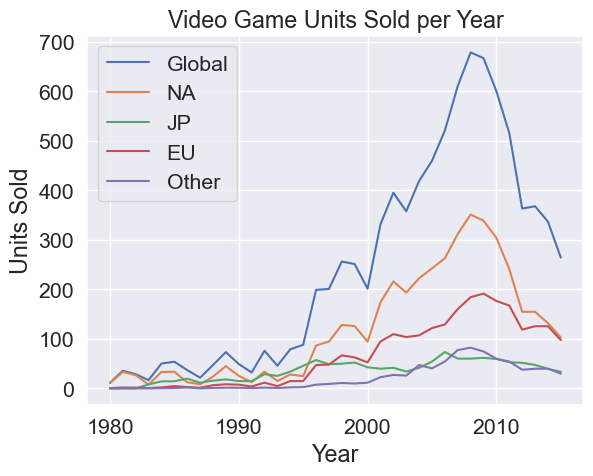

In [101]:
plt.plot(df2.index, df2["Global"], label = "Global")
plt.plot(df2.index, df2["NA"], label = "NA")
plt.plot(df2.index, df2["JP"], label = "JP")
plt.plot(df2.index, df2["EU"], label = "EU")
plt.plot(df2.index, df2["Other"], label = "Other")

plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.legend()
plt.title("Video Game Units Sold per Year")

plt.show()

In [102]:
mix1 = sales_data_clean.loc[sales_data_clean.Genre.isin(["Shooter", "Role-Playing", "Sports & Racing"])]
genre_mix1 = []

for x in mix1["Genre"]:
    
    if x not in genre_mix1:
        genre_mix1.append(x)
genre_mix1.sort()

In [103]:
mix1.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
0,Wii Sports,Wii,2006,Sports & Racing,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,Wii Sports Resort,Wii,2009,Sports & Racing,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Nintendo


In [104]:
mix1.loc[mix1.Genre=="Shooter"].sort_values(by="JP_Sales", ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
235,Splatoon,WiiU,2015,Shooter,Nintendo,1.55,1.15,1.44,0.43,4.57,Nintendo
1234,Xevious,NES,1984,Shooter,Namco Bandai Games,0.18,0.06,1.27,0.01,1.52,Nintendo
1675,TwinBee,NES,1986,Shooter,Konami Digital Entertainment,0.00,0.00,1.20,0.00,1.20,Nintendo
1427,Gradius,NES,1986,Shooter,Konami Digital Entertainment,0.27,0.08,1.00,0.01,1.36,Nintendo
438,Resident Evil 6,PS3,2012,Shooter,Capcom,0.88,0.97,0.88,0.42,3.15,Sony
472,Star Fox,SNES,1993,Shooter,Nintendo,1.61,0.51,0.80,0.07,2.99,Nintendo
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,Sony
296,Star Fox 64,N64,1997,Shooter,Nintendo,2.78,0.58,0.64,0.04,4.03,Nintendo
3237,Virtua Cop,SAT,1995,Shooter,Sega,0.00,0.00,0.62,0.00,0.62,Sega
2158,Star Soldier,NES,1986,Shooter,Hudson Soft,0.32,0.06,0.57,0.01,0.96,Nintendo


The correlation is 0.81.


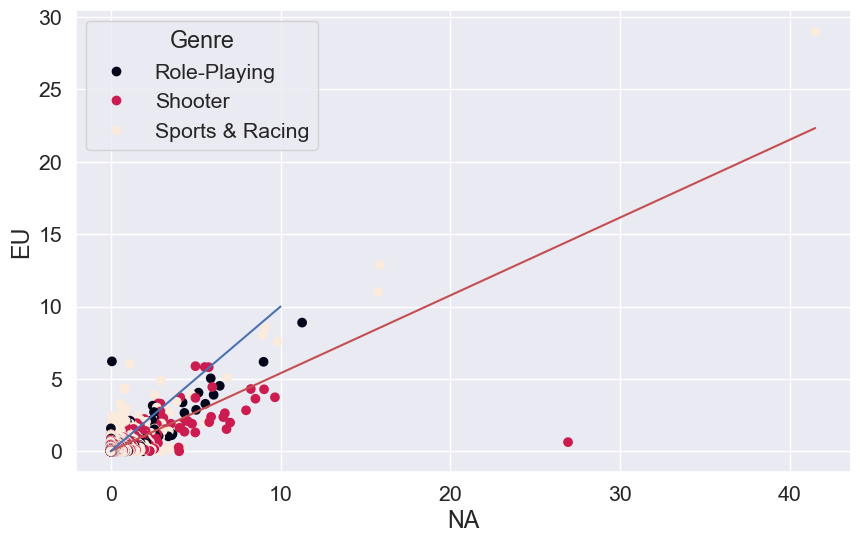

In [105]:
corr = round(st.pearsonr(mix1["NA_Sales"], mix1["EU_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = mix1["NA_Sales"]
y_values = mix1["EU_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = mix1.Genre.astype('category').cat.codes)

plt.plot(x_values,regress_values,"r-")
x = np.linspace(0,10,100)
y = x
plt.plot(x,y)

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_mix1,
           title="Genre")

plt.xlabel("NA")
plt.ylabel("EU")
plt.show()

In [106]:
mix2 = sales_data_clean.loc[sales_data_clean.Genre.isin(["Action", "Adventure"])]
genre_mix2 = []

for x in mix2["Genre"]:
    
    if x not in genre_mix2:
        genre_mix2.append(x)
genre_mix2.sort()

The correlation is 0.66.


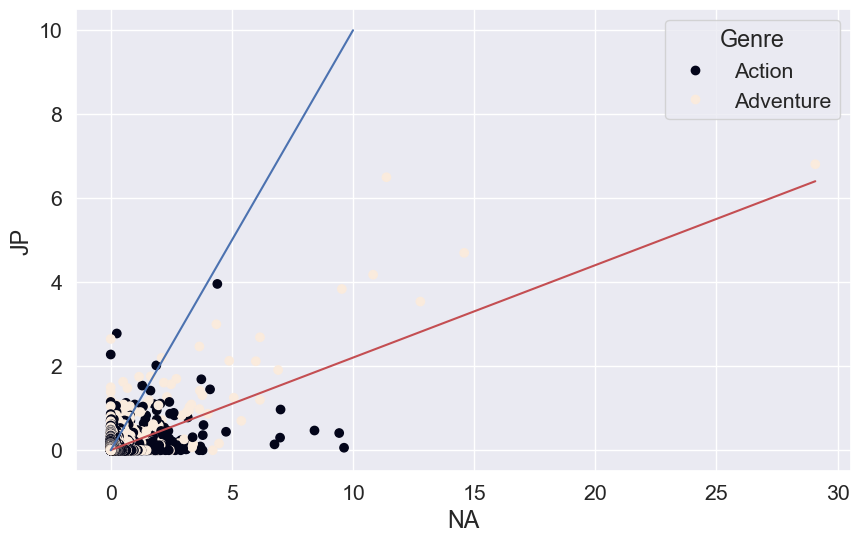

In [107]:
corr = round(st.pearsonr(mix2["NA_Sales"], mix2["JP_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = mix2["NA_Sales"]
y_values = mix2["JP_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = mix2.Genre.astype('category').cat.codes)

plt.plot(x_values,regress_values,"r-")
x = np.linspace(0,10,100)
y = x
plt.plot(x,y)

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_mix2,
           title="Genre")

plt.xlabel("NA")
plt.ylabel("JP")
plt.show()

The correlation is 0.96.


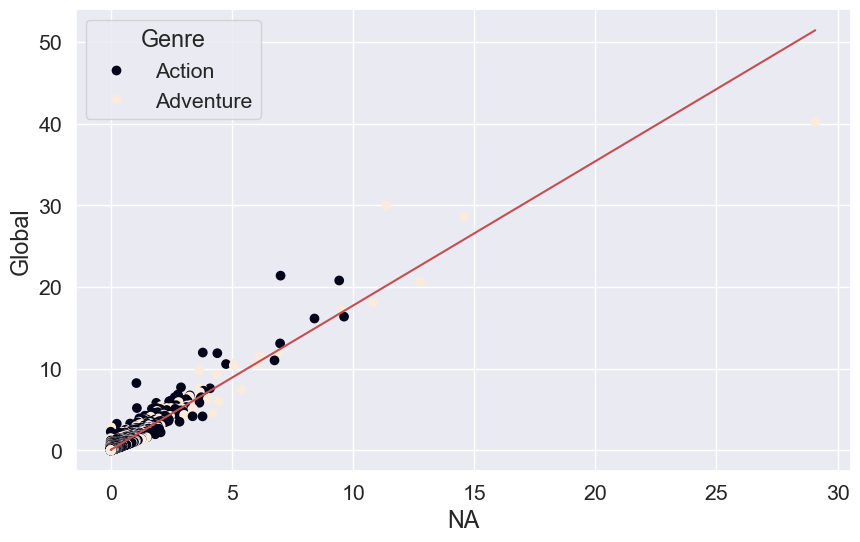

In [108]:
corr = round(st.pearsonr(mix2["NA_Sales"], mix2["Global_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = mix2["NA_Sales"]
y_values = mix2["Global_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = mix2.Genre.astype('category').cat.codes)

plt.plot(x_values,regress_values,"r-")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_mix2,
           title="Genre")

plt.xlabel("NA")
plt.ylabel("Global")
plt.show()

In [109]:
bins = [1980, 1989, 1999, 2009, 2015]
labels = ["1980s", "1990s", "2000s", "2010s"]

In [110]:
sales_decade = sales_data_clean.copy()

In [111]:
gcolors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]

In [112]:
sales_decade["Decade"] = pd.cut(sales_decade["Year"],bins=bins, labels=labels)
sales_decade

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company,Decade
0,Wii Sports,Wii,2006,Sports & Racing,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,2000s
1,Super Mario Bros.,NES,1985,Adventure,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,1980s
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,2000s
3,Wii Sports Resort,Wii,2009,Sports & Racing,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,2000s
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Adventure,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Sports & Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony,2000s
16596,Know How 2,DS,2010,Puzzle & Strategy,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nintendo,2010s


In [113]:
decade = sales_decade.groupby(["Decade", "Platform Company", "Genre"]).size().reset_index()
decade.columns = ["Decade", "Platform Company", "Genre", "Count"]
decade

,Decade,Platform Company,Genre,Count
0,1980s,3DO,Action,0
1,1980s,3DO,Adventure,0
2,1980s,3DO,Fighting,0
3,1980s,3DO,Misc,0
4,1980s,3DO,Puzzle & Strategy,0
...,...,...,...,...
355,2010s,Sony,Puzzle & Strategy,56
356,2010s,Sony,Role-Playing,284
357,2010s,Sony,Shooter,127
358,2010s,Sony,Simulation,32


In [114]:
sub = decade.loc[(decade["Decade"] == "1980s") & (decade["Platform Company"] == "Nintendo")]
sub

,Decade,Platform Company,Genre,Count
45,1980s,Nintendo,Action,11
46,1980s,Nintendo,Adventure,25
47,1980s,Nintendo,Fighting,3
48,1980s,Nintendo,Misc,3
49,1980s,Nintendo,Puzzle & Strategy,11
50,1980s,Nintendo,Role-Playing,9
51,1980s,Nintendo,Shooter,8
52,1980s,Nintendo,Simulation,0
53,1980s,Nintendo,Sports & Racing,17


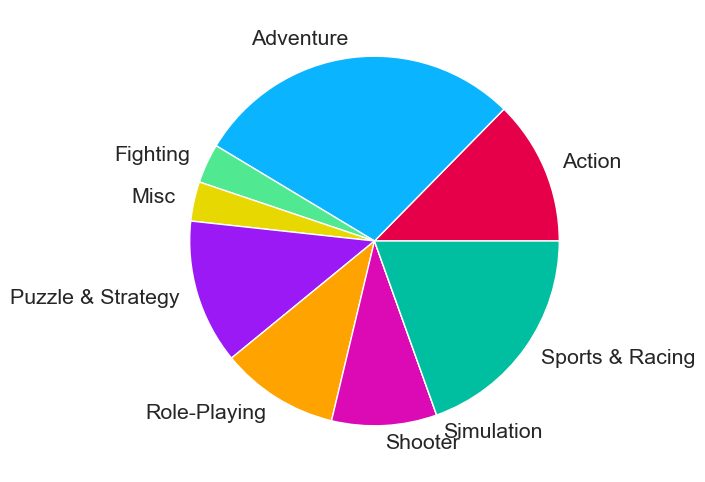

In [115]:
plt.figure(figsize=(10,6))
plt.pie(sub.Count, labels = sub.Genre, colors= gcolors)
plt.show()

In [116]:
decade = sales_decade.groupby(["Decade", "Genre"])["NA_Sales"].sum().reset_index()
decade.columns = ["Decade",  "Genre", "Count"]
decade

,Decade,Genre,Count
0,1980s,Action,37.58
1,1980s,Adventure,76.91
2,1980s,Fighting,2.80
3,1980s,Misc,0.82
4,1980s,Puzzle & Strategy,43.69
5,1980s,Role-Playing,1.06
6,1980s,Shooter,44.28
7,1980s,Simulation,0.42
8,1980s,Sports & Racing,17.51
9,1990s,Action,73.00


In [117]:
sub = decade.loc[decade["Decade"] == "1980s"]
sub

,Decade,Genre,Count
0,1980s,Action,37.58
1,1980s,Adventure,76.91
2,1980s,Fighting,2.80
3,1980s,Misc,0.82
4,1980s,Puzzle & Strategy,43.69
5,1980s,Role-Playing,1.06
6,1980s,Shooter,44.28
7,1980s,Simulation,0.42
8,1980s,Sports & Racing,17.51


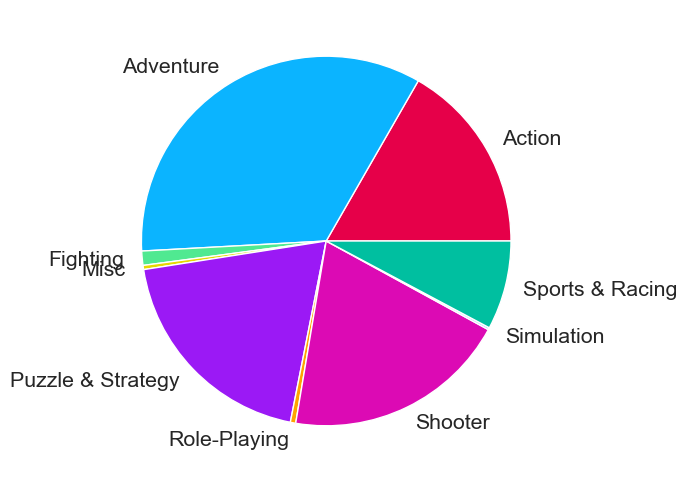

In [118]:
plt.figure(figsize=(10,6))
plt.pie(sub.Count, labels = sub.Genre, colors= gcolors)
plt.show()

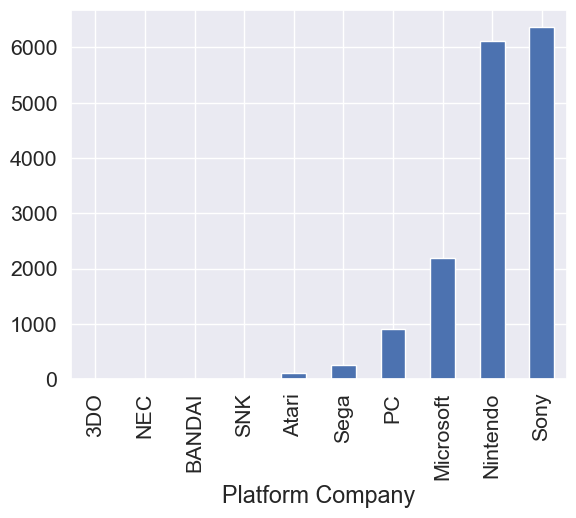

In [119]:
sales_data_clean.groupby("Platform Company").Global_Sales.count().sort_values().plot(kind="bar")
sns.set(font_scale=1.4)

Text(0.5, 1.02, 'Unit Sold by the Platfrom')

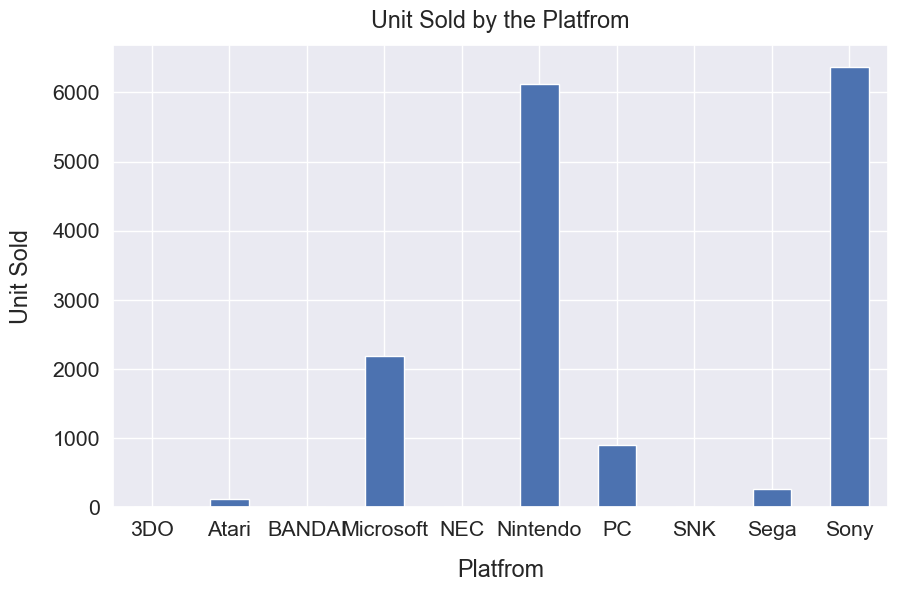

In [120]:
sales_data_clean.groupby("Platform Company").Global_Sales.count().plot(kind="bar", figsize=(10, 6), rot=0)
plt.xlabel("Platfrom", labelpad=14)
plt.ylabel("Unit Sold", labelpad=14)
plt.title("Unit Sold by the Platfrom", y=1.02)

In [121]:
sales_data_hero = decade.loc[sales_data_clean["NA_Sales"]<10]

In [122]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
genre_total_list = []

for genre in genre_name:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sales_total = sales_decade.loc[sales_decade["Genre"] == genre, "NA_Sales"]
  
    # add subset 
    genre_total_list.append(sales_total)
    
    # Determine outliers using upper and lower bounds
    quartiles = sales_total.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = sales_total.loc[(sales_total < lower_bound) | (sales_total > upper_bound)]
    if outliers.empty:
        print(f"There were {len(sales_total)} total games")
        print(f"With an IQR of {round(iqr,2)}, there were no potential outliers.")
    else: 
        print(f"There were {len(sales_total)} total {genre} games.")
        print(f"With an IQR of {round(iqr,2)}, there are {len(outliers)} outliers that sold greater than {round(upper_bound,2)} units.")
        print(f"{round(len(outliers)/len(sales_total),3)*100}% of total {genre} games were outliers.\n")

There were 3133 total Action games.
With an IQR of 0.25, there are 308 outliers that sold greater than 0.64 units.
9.8% of total Action games were outliers.

There were 2108 total Adventure games.
With an IQR of 0.18, there are 255 outliers that sold greater than 0.45 units.
12.1% of total Adventure games were outliers.

There were 822 total Fighting games.
With an IQR of 0.29, there are 88 outliers that sold greater than 0.72 units.
10.7% of total Fighting games were outliers.

There were 1692 total Misc games.
With an IQR of 0.21, there are 160 outliers that sold greater than 0.52 units.
9.5% of total Misc games were outliers.

There were 1232 total Puzzle & Strategy games.
With an IQR of 0.11, there are 140 outliers that sold greater than 0.28 units.
11.4% of total Puzzle & Strategy games were outliers.

There were 1429 total Role-Playing games.
With an IQR of 0.17, there are 162 outliers that sold greater than 0.43 units.
11.3% of total Role-Playing games were outliers.

There were

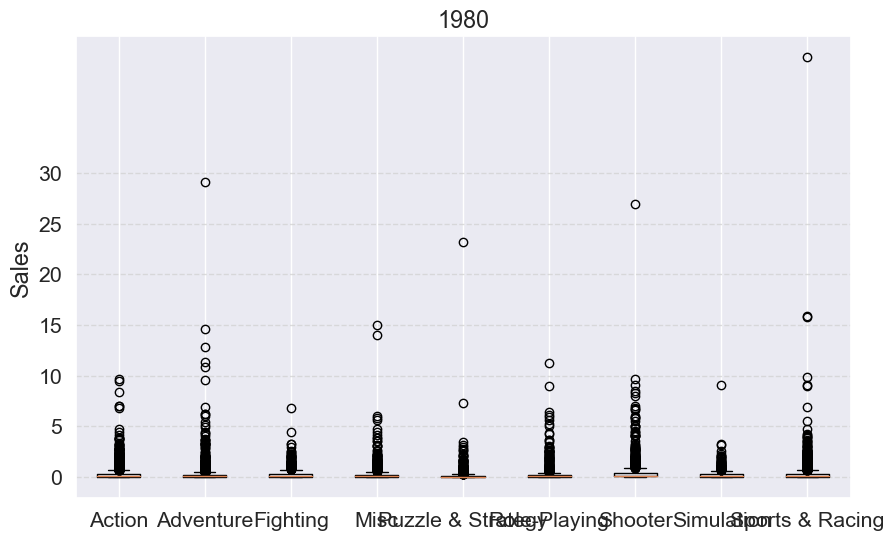

In [123]:
plt.figure(figsize=(10,6))
plt.boxplot(genre_total_list, labels = genre_name)
plt.ylabel('Sales')

plt.yticks(np.arange(0,35,5))
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.8)
plt.title(1980)
plt.show()

There were 65 total Action games.
With an IQR of 0.36, there are 6 outliers that sold greater than 1.17 units.
9.2% of total Action games were outliers.

There were 35 total Adventure games.
With an IQR of 0.74, there are 5 outliers that sold greater than 2.24 units.
14.299999999999999% of total Adventure games were outliers.

There were 3 total games
With an IQR of 1.01, there were no potential outliers.
There were 4 total Misc games.
With an IQR of 0.21, there are 1 outliers that sold greater than 0.53 units.
25.0% of total Misc games were outliers.

There were 19 total Puzzle & Strategy games.
With an IQR of 1.3, there are 2 outliers that sold greater than 3.49 units.
10.5% of total Puzzle & Strategy games were outliers.

There were 9 total Role-Playing games.
With an IQR of 0.15, there are 1 outliers that sold greater than 0.38 units.
11.1% of total Role-Playing games were outliers.

There were 28 total Shooter games.
With an IQR of 0.68, there are 1 outliers that sold greater than

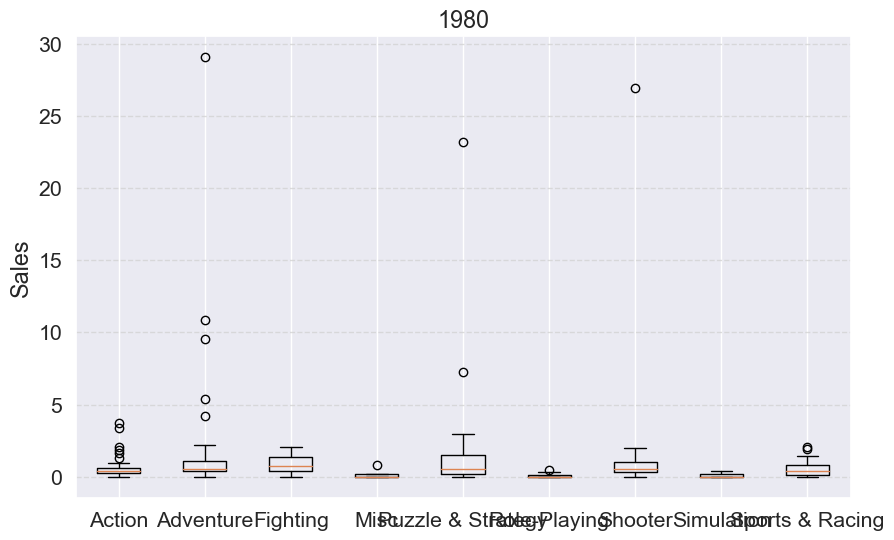

In [124]:
sales_decade_1980 = sales_decade.loc[sales_decade["Decade"] == "1980s"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
genre_total_list = []

for genre in genre_name:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sales_total = sales_decade_1980.loc[sales_decade_1980["Genre"] == genre, "NA_Sales"]
    
    # add subset 
    genre_total_list.append(sales_total)
    
    # Determine outliers using upper and lower bounds
    quartiles = sales_total.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = sales_total.loc[(sales_total < lower_bound) | (sales_total > upper_bound)]
    if outliers.empty:
        print(f"There were {len(sales_total)} total games")
        print(f"With an IQR of {round(iqr,2)}, there were no potential outliers.")
    else: 
        print(f"There were {len(sales_total)} total {genre} games.")
        print(f"With an IQR of {round(iqr,2)}, there are {len(outliers)} outliers that sold greater than {round(upper_bound,2)} units.")
        print(f"{round(len(outliers)/len(sales_total),3)*100}% of total {genre} games were outliers.\n")
        
plt.figure(figsize=(10,6))
plt.boxplot(genre_total_list, labels = genre_name)
plt.ylabel('Sales')

plt.yticks(np.arange(0,35,5))
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.8)
plt.title(1980)
plt.show()

There were 162 total Action games.
With an IQR of 0.43, there are 21 outliers that sold greater than 1.12 units.
13.0% of total Action games were outliers.

There were 222 total Adventure games.
With an IQR of 0.54, there are 28 outliers that sold greater than 1.36 units.
12.6% of total Adventure games were outliers.

There were 193 total Fighting games.
With an IQR of 0.25, there are 30 outliers that sold greater than 0.62 units.
15.5% of total Fighting games were outliers.

There were 116 total Misc games.
With an IQR of 0.2, there are 20 outliers that sold greater than 0.51 units.
17.2% of total Misc games were outliers.

There were 194 total Puzzle & Strategy games.
With an IQR of 0.07, there are 34 outliers that sold greater than 0.18 units.
17.5% of total Puzzle & Strategy games were outliers.

There were 172 total Role-Playing games.
With an IQR of 0.11, there are 20 outliers that sold greater than 0.28 units.
11.600000000000001% of total Role-Playing games were outliers.

There

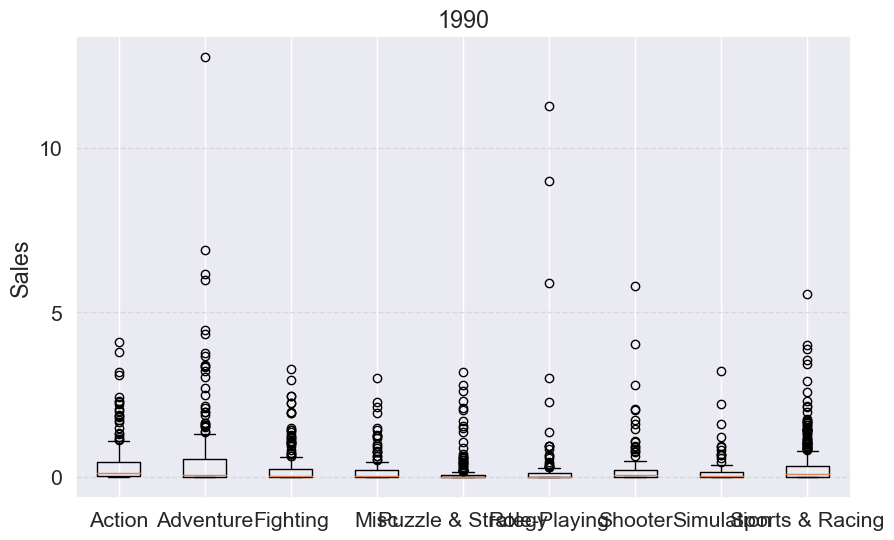

In [125]:
sales_decade_1990 = sales_decade.loc[sales_decade["Decade"] == "1990s"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
genre_total_list = []

for genre in genre_name:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sales_total = sales_decade_1990.loc[sales_decade_1990["Genre"] == genre, "NA_Sales"]
      
    # add subset 
    genre_total_list.append(sales_total)
    
    # Determine outliers using upper and lower bounds
    quartiles = sales_total.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = sales_total.loc[(sales_total < lower_bound) | (sales_total > upper_bound)]
    if outliers.empty:
        print(f"There were {len(sales_total)} total games")
        print(f"With an IQR of {round(iqr,2)}, there were no potential outliers.")
    else: 
        print(f"There were {len(sales_total)} total {genre} games.")
        print(f"With an IQR of {round(iqr,2)}, there are {len(outliers)} outliers that sold greater than {round(upper_bound,2)} units.")
        print(f"{round(len(outliers)/len(sales_total),3)*100}% of total {genre} games were outliers.\n")
        
plt.figure(figsize=(10,6))
plt.boxplot(genre_total_list, labels = genre_name)
plt.ylabel('Sales')

plt.yticks(np.arange(0,15,5))
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.8)
plt.title(1990)
plt.show()

There were 1585 total Action games.
With an IQR of 0.25, there are 150 outliers that sold greater than 0.66 units.
9.5% of total Action games were outliers.

There were 1201 total Adventure games.
With an IQR of 0.2, there are 117 outliers that sold greater than 0.5 units.
9.700000000000001% of total Adventure games were outliers.

There were 442 total Fighting games.
With an IQR of 0.3, there are 46 outliers that sold greater than 0.76 units.
10.4% of total Fighting games were outliers.

There were 1023 total Misc games.
With an IQR of 0.22, there are 97 outliers that sold greater than 0.55 units.
9.5% of total Misc games were outliers.

There were 745 total Puzzle & Strategy games.
With an IQR of 0.12, there are 71 outliers that sold greater than 0.3 units.
9.5% of total Puzzle & Strategy games were outliers.

There were 732 total Role-Playing games.
With an IQR of 0.19, there are 84 outliers that sold greater than 0.48 units.
11.5% of total Role-Playing games were outliers.

There w

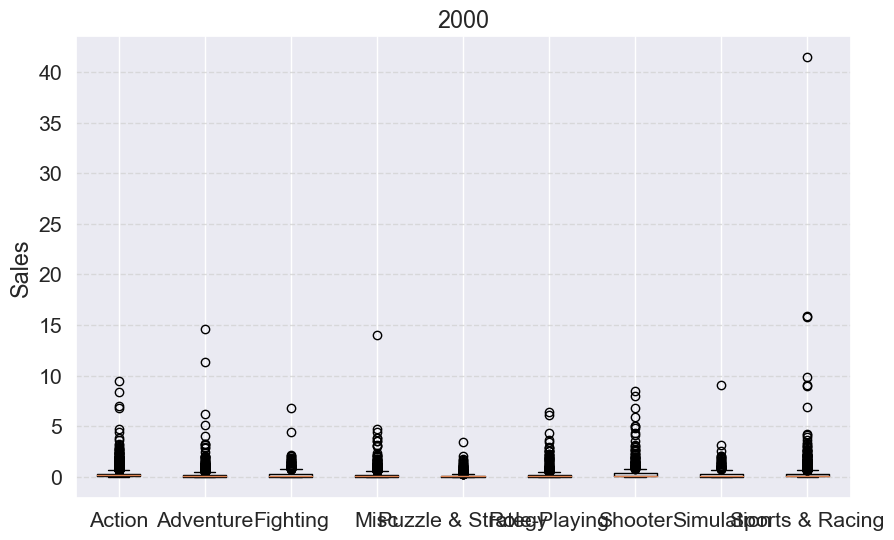

In [126]:
sales_decade_2000 = sales_decade.loc[sales_decade["Decade"] == "2000s"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
genre_total_list = []

for genre in genre_name:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sales_total = sales_decade_2000.loc[sales_decade_2000["Genre"] == genre, "NA_Sales"]
          
    # add subset 
    genre_total_list.append(sales_total)
    
    # Determine outliers using upper and lower bounds
    quartiles = sales_total.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = sales_total.loc[(sales_total < lower_bound) | (sales_total > upper_bound)]
    if outliers.empty:
        print(f"There were {len(sales_total)} total games")
        print(f"With an IQR of {round(iqr,2)}, there were no potential outliers.")
    else: 
        print(f"There were {len(sales_total)} total {genre} games.")
        print(f"With an IQR of {round(iqr,2)}, there are {len(outliers)} outliers that sold greater than {round(upper_bound,2)} units.")
        print(f"{round(len(outliers)/len(sales_total),3)*100}% of total {genre} games were outliers.\n")
        
plt.figure(figsize=(10,6))
plt.boxplot(genre_total_list, labels = genre_name)
plt.ylabel('Sales')

plt.yticks(np.arange(0,45,5))
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.8)
plt.title(2000)
plt.show()

In [137]:
sales_decade_2010 = sales_decade.loc[sales_decade["Decade"] == "2010s"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
genre_total_list = []

for genre in genre_name:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sales_total = sales_decade_2010.loc[sales_decade_2010["Genre"] == genre, "NA_Sales"]
          
    # add subset 
    genre_total_list.append(sales_total)
    
    # Determine outliers using upper and lower bounds
    quartiles = sales_total.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = sales_total.loc[(sales_total < lower_bound) | (sales_total > upper_bound)]
    if outliers.empty:
        print(f"There were {len(sales_total)} total games")
        print(f"With an IQR of {round(iqr,2)}, there were no potential outliers.")
    else: 
        print(f"There were {len(sales_total)} total {genre} games.")
        print(f"With an IQR of {round(iqr,2)}, there are {len(outliers)} outliers that sold greater than {round(upper_bound,2)} units.")
        print(f"{round(len(outliers)/len(sales_total),3)*100}% of total {genre} games were outliers.\n")
        
plt.figure(figsize=(10,6))
plt.boxplot(genre_total_list, labels = genre_name, c=gcolors)
plt.ylabel('Sales')

plt.yticks(np.arange(0,16,5))
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.8)
plt.xticks(rotation=90)
plt.title(2010)
plt.show()

There were 1320 total Action games.
With an IQR of 0.2, there are 143 outliers that sold greater than 0.5 units.
10.8% of total Action games were outliers.

There were 650 total Adventure games.
With an IQR of 0.07, there are 91 outliers that sold greater than 0.18 units.
14.000000000000002% of total Adventure games were outliers.

There were 183 total Fighting games.
With an IQR of 0.23, there are 12 outliers that sold greater than 0.58 units.
6.6000000000000005% of total Fighting games were outliers.

There were 545 total Misc games.
With an IQR of 0.18, there are 51 outliers that sold greater than 0.45 units.
9.4% of total Misc games were outliers.

There were 274 total Puzzle & Strategy games.
With an IQR of 0.08, there are 23 outliers that sold greater than 0.2 units.
8.4% of total Puzzle & Strategy games were outliers.

There were 516 total Role-Playing games.
With an IQR of 0.16, there are 64 outliers that sold greater than 0.4 units.
12.4% of total Role-Playing games were outli

TypeError: boxplot() got an unexpected keyword argument 'c'

<Figure size 1000x600 with 0 Axes>

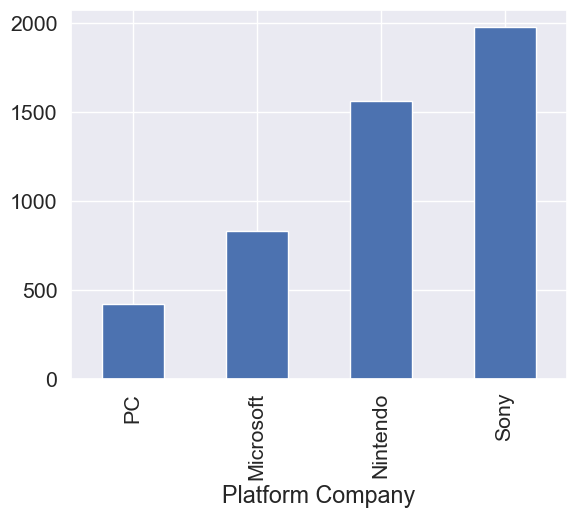

In [136]:
sales_decade_2010.groupby("Platform Company").NA_Sales.count().sort_values().plot(kind="bar")
sns.set(font_scale=1.4)